* Make the figure showing density of point cloud
* Make the figure showing density of Gaussian smoothed point cloud 
* Showing the gradient field of the point cloud

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from os.path import join
import sys
sys.path.append("/Users/binxuwang/Github/DiffusionLearningCurve")
from core.gaussian_mixture_lib import GaussianMixture_torch

In [3]:
mus = torch.tensor([[2.5, 1.5], [-1.5, 2.0], [2.0, -2.0]])
covs = torch.stack([
    torch.tensor([[0.7, -0.3], [-0.3, 0.6]]), 
    torch.tensor([[0.4, 0.1], [0.1, 0.9]]),
    torch.tensor([[0.6, -0.2], [-0.2, 0.5]])
])
gmm = GaussianMixture_torch(mus, covs, weights=None)

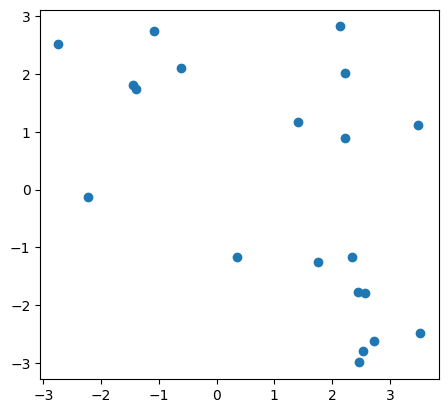

In [37]:
pnts, _, _ = gmm.sample(20)
plt.scatter(pnts[:, 0], pnts[:, 1])
plt.axis('image')
plt.show()

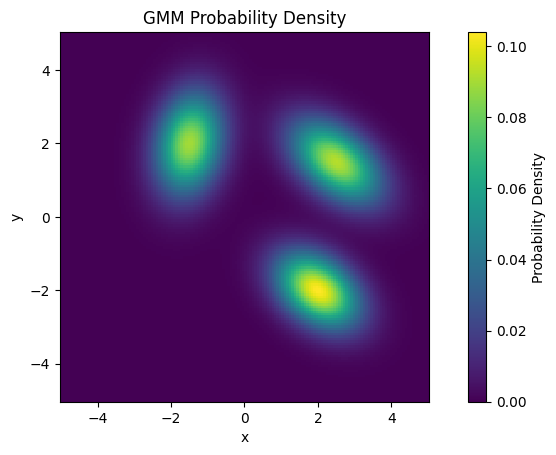

In [38]:
# Create a grid of points
x = torch.linspace(-5, 5, 150)
y = torch.linspace(-5, 5, 150)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T
# Compute probability density at each point
prob = gmm.pdf(xy).reshape(150, 150)
# prob = gmm.log_pdf(xy).exp().reshape(100, 100)
# Plot the probability density map
plt.figure()
plt.pcolormesh(X, Y, prob, shading='auto')
plt.colorbar(label='Probability Density')
plt.axis('image')
plt.xlabel('x')
plt.ylabel('y')
plt.title('GMM Probability Density')
plt.show()

In [39]:
# sample points from GMM
n_samples = 20
pnts, _, _ = gmm.sample(n_samples)
# smooth the points with Gaussian kernel
sigma = 0.5
covs = [torch.eye(2) * sigma for _ in range(n_samples)]
gmm_smooth = GaussianMixture_torch(pnts, covs, weights=None)
# compute the gradient field of the smoothed points

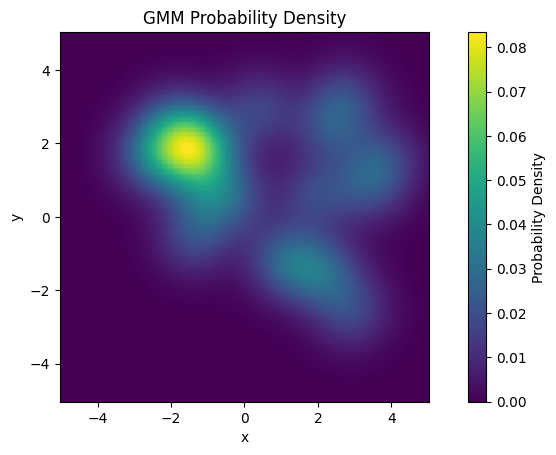

In [40]:
# Create a grid of points
x = torch.linspace(-5, 5, 150)
y = torch.linspace(-5, 5, 150)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T
# Compute probability density at each point
prob = gmm_smooth.pdf(xy).reshape(150, 150)
# prob = gmm.log_pdf(xy).exp().reshape(100, 100)
# Plot the probability density map
plt.figure()
plt.pcolormesh(X, Y, prob, shading='auto')
plt.colorbar(label='Probability Density')
plt.axis('image')
plt.xlabel('x')
plt.ylabel('y')
plt.title('GMM Probability Density')
plt.show()

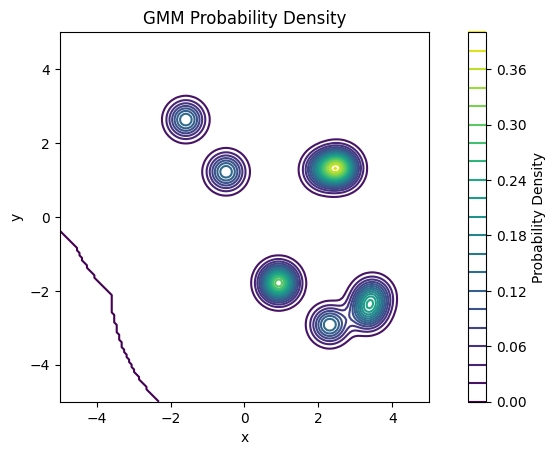

In [54]:
# Create a grid of points
x = torch.linspace(-5, 5, 150)
y = torch.linspace(-5, 5, 150)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T
# Compute probability density at each point
prob = gmm_smooth.pdf(xy).reshape(150, 150)
# prob = gmm.log_pdf(xy).exp().reshape(100, 100)
# Plot the probability density map
plt.figure()
plt.contour(X, Y, prob, levels=20)
plt.colorbar(label='Probability Density')
plt.axis('image')
plt.xlabel('x')
plt.ylabel('y')
plt.title('GMM Probability Density')
plt.show()

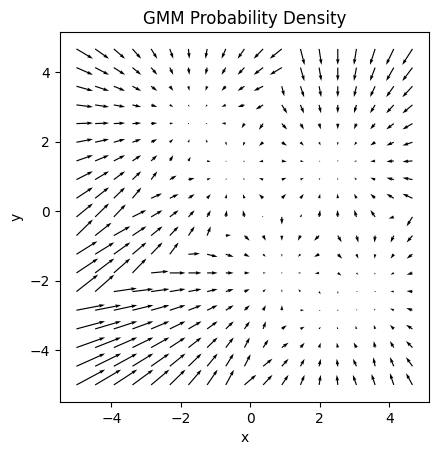

In [55]:
# Create a grid of points
x = torch.linspace(-5, 5, 150)
y = torch.linspace(-5, 5, 150)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T
# Compute probability density at each point
score_vecs = gmm_smooth.score(xy)
score_vecs = score_vecs.reshape(150, 150, 2)
# prob = gmm.log_pdf(xy).exp().reshape(100, 100)
# Plot the probability density map
plt.figure()
# plt.pcolormesh(X, Y, prob, shading='auto')
subsp = slice(None, None, 8)
plt.quiver(X[subsp, subsp], Y[subsp, subsp], 
           score_vecs[subsp, subsp, 0], score_vecs[subsp, subsp, 1])
# plt.colorbar(label='Probability Density')
plt.axis('image')
plt.xlabel('x')
plt.ylabel('y')
plt.title('GMM Probability Density')
plt.show()

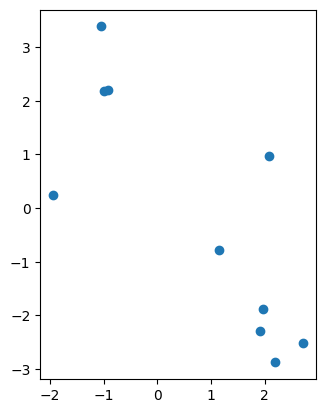

In [58]:
# sample points from GMM
n_samples = 10
pnts, _, _ = gmm.sample(n_samples)
# smooth the points with Gaussian kernel
sigma = 0.6
covs = [torch.eye(2) * sigma for _ in range(n_samples)]
gmm_smooth = GaussianMixture_torch(pnts, covs, weights=None)
plt.figure()
plt.scatter(pnts[:, 0], pnts[:, 1])
plt.axis('image')
plt.show()


(-5.0, 5.0)
(-5.0, 5.0)


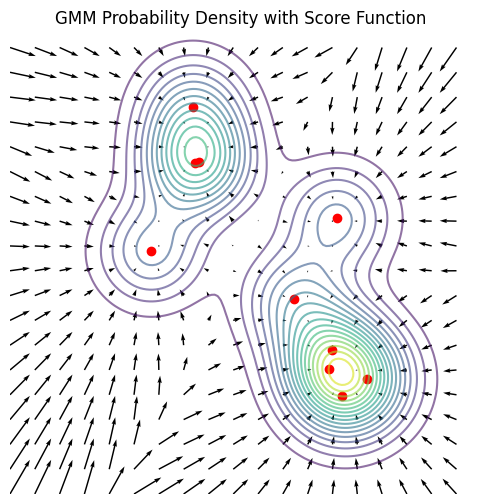

In [63]:
# Create a grid of points
x = torch.linspace(-5, 5, 150)
y = torch.linspace(-5, 5, 150)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T

# Compute probability density and score at each point
prob = gmm_smooth.pdf(xy).reshape(150, 150)
score_vecs = gmm_smooth.score(xy)
score_vecs = score_vecs.reshape(150, 150, 2)

# Plot the probability density map with gradient vectors
plt.figure(figsize=(8, 6))
plt.contour(X, Y, prob, levels=20, alpha=0.6)
# plt.colorbar(label='Probability Density')
subsp = slice(None, None, 8)
plt.quiver(X[subsp, subsp], Y[subsp, subsp], 
           score_vecs[subsp, subsp, 0], score_vecs[subsp, subsp, 1])
plt.scatter(pnts[:, 0], pnts[:, 1], color='red', label='Samples')
plt.axis('image')
plt.axis('off')
plt.xlabel('x')
plt.ylabel('y')
plt.title('GMM Probability Density with Score Function')
print(plt.xlim())
print(plt.ylim())
plt.show()

In [65]:
from circuit_toolkit.plot_utils import saveallforms

In [68]:
savedir = "/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/Manuscript_DiffusionLearningCurve/Talk_Figures/diffusion_demo"

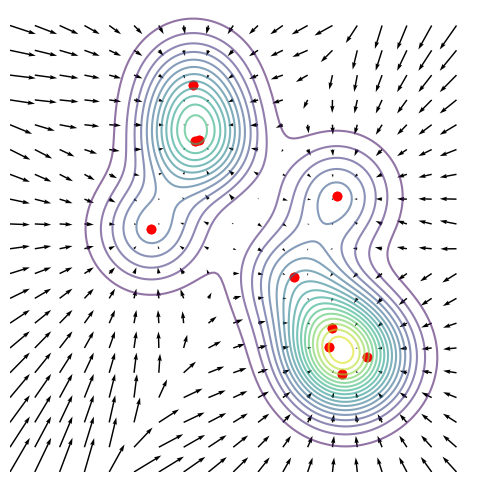

In [70]:
# Create a grid of points
x = torch.linspace(-5, 5, 150)
y = torch.linspace(-5, 5, 150)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T

# Compute probability density and score at each point
prob = gmm_smooth.pdf(xy).reshape(150, 150)
score_vecs = gmm_smooth.score(xy)
score_vecs = score_vecs.reshape(150, 150, 2)

# Plot the probability density map with gradient vectors
plt.figure(figsize=(6, 6))

plt.scatter(pnts[:, 0], pnts[:, 1], color='red', label='Samples')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.axis('image')
plt.axis('off')
saveallforms(savedir, "gmm_score_matching_samples", plt.gcf())
plt.contour(X, Y, prob, levels=20, alpha=0.6)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.axis('image')
plt.axis('off')
saveallforms(savedir, "gmm_score_matching_smoothed_density", plt.gcf())
# plt.colorbar(label='Probability Density')
subsp = slice(None, None, 8)
plt.quiver(X[subsp, subsp], Y[subsp, subsp], 
           score_vecs[subsp, subsp, 0], score_vecs[subsp, subsp, 1])
plt.scatter(pnts[:, 0], pnts[:, 1], color='red', label='Samples')
plt.axis('image')
plt.axis('off')
saveallforms(savedir, "gmm_score_matching_gradient_field", plt.gcf())
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('GMM Probability Density with Score Function')
plt.show()

In [ ]:
# sample points from GMM
n_samples = 10
pnts, _, _ = gmm.sample(n_samples)
# smooth the points with Gaussian kernel
sigma = 0.6
covs = [torch.eye(2) * sigma for _ in range(n_samples)]
gmm_smooth = GaussianMixture_torch(pnts, covs, weights=None)
plt.figure()
plt.scatter(pnts[:, 0], pnts[:, 1])
plt.axis('image')
plt.show()


### Time varying vector field

In [74]:
def gmm_add_noise(gmm, noise_level):
    mus = gmm.mus.clone()
    covs_new = [cov + torch.eye(gmm.dim) * noise_level**2 for cov in gmm.covs]
    return GaussianMixture_torch(mus, covs_new, weights=gmm.weights)

gmm_t = gmm_add_noise(gmm_smooth, 0.1)

/Users/binxuwang/Github/DiffusionLearningCurve/core/gaussian_mixture_lib.py:125: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = torch.tensor(weights)


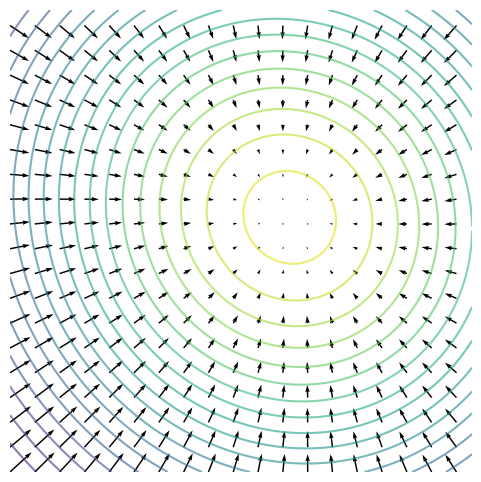

In [83]:
# Create a grid of points
x = torch.linspace(-5, 5, 150)
y = torch.linspace(-5, 5, 150)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T

gmm_t = gmm_add_noise(gmm, 5)
# Compute probability density and score at each point
prob = gmm_t.pdf(xy).reshape(150, 150)
score_vecs = gmm_t.score(xy)
score_vecs = score_vecs.reshape(150, 150, 2)

# Plot the probability density map with gradient vectors
plt.figure(figsize=(6, 6))
# plt.scatter(pnts[:, 0], pnts[:, 1], color='red', label='Samples')
plt.contour(X, Y, prob, levels=20, alpha=0.6)
subsp = slice(None, None, 8)
plt.quiver(X[subsp, subsp], Y[subsp, subsp], 
           score_vecs[subsp, subsp, 0], score_vecs[subsp, subsp, 1])
# plt.scatter(pnts[:, 0], pnts[:, 1], color='red', label='Samples')
plt.axis('image')
plt.axis('off')
# saveallforms(savedir, "gmm_score_matching_gradient_field", plt.gcf())
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('GMM Probability Density with Score Function')
plt.show()

/Users/binxuwang/Github/DiffusionLearningCurve/core/gaussian_mixture_lib.py:125: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = torch.tensor(weights)


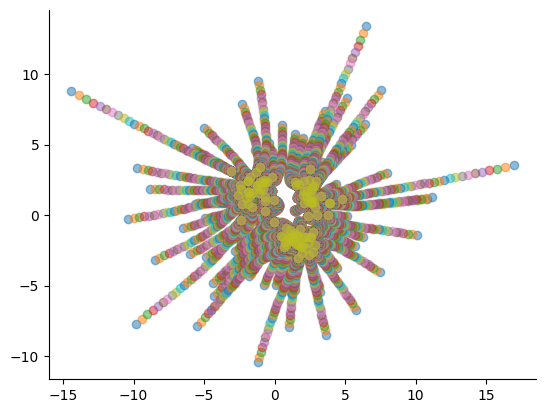

In [90]:
import math, numpy as np
n_samples = 100
sigma_T = 5
x_init = torch.randn(n_samples, 2) * sigma_T
x_t = x_init 
x_traj = [x_t]
sigma_steps = np.logspace(math.log10(sigma_T), math.log10(0.001), 200)
for sigma_t, sigma_t_next in zip(sigma_steps[:-1], sigma_steps[1:]):
    gmm_t = gmm_add_noise(gmm, sigma_t)
    score_t = gmm_t.score(x_t)
    x_t = x_t - score_t * sigma_t * (sigma_t_next - sigma_t)
    plt.scatter(x_t[:, 0], x_t[:, 1], alpha=0.5)
    x_traj.append(x_t)
x_traj = torch.stack(x_traj, dim=0)
plt.axis('image')
plt.show()

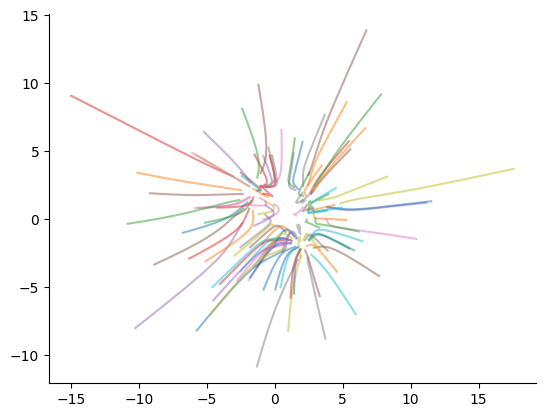

In [92]:
plt.plot(x_traj[:, :, 0], x_traj[:, :, 1], alpha=0.5)
plt.axis('image')
plt.show()

In [93]:
import math, numpy as np
n_samples = 100
sigma_T = 5
x_init = torch.randn(n_samples, 2, generator=torch.Generator().manual_seed(42)) * sigma_T
x_t = x_init 
x_traj = [x_t]
sigma_steps = np.logspace(math.log10(sigma_T), math.log10(0.001), 200)
for sigma_t, sigma_t_next in zip(sigma_steps[:-1], sigma_steps[1:]):
    gmm_t = gmm_add_noise(gmm, sigma_t)
    score_t = gmm_t.score(x_t)
    x_t = x_t - score_t * sigma_t * (sigma_t_next - sigma_t)
    x_traj.append(x_t)
x_traj = torch.stack(x_traj, dim=0)

/Users/binxuwang/Github/DiffusionLearningCurve/core/gaussian_mixture_lib.py:125: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = torch.tensor(weights)


/Users/binxuwang/Github/DiffusionLearningCurve/core/gaussian_mixture_lib.py:125: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = torch.tensor(weights)


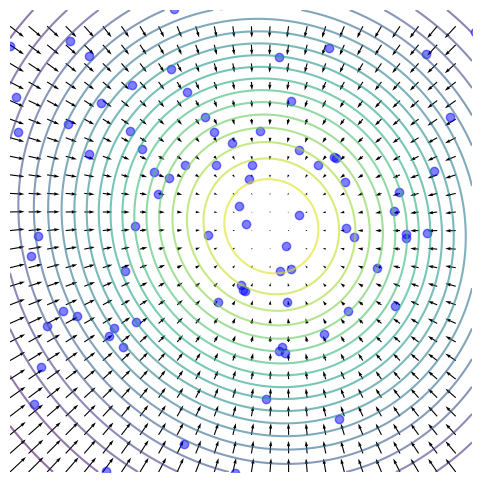

In [104]:
x = torch.linspace(-8, 8, 200)
y = torch.linspace(-8, 8, 200)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T
for i in range(x_traj.shape[0]):
    sigma_t = sigma_steps[i]
    gmm_t = gmm_add_noise(gmm, sigma_t)
    score_vecs = gmm_t.score(xy)
    score_vecs = score_vecs.reshape(200, 200, 2)
    pdf_t = gmm_t.pdf(xy).reshape(200, 200)
    plt.figure(figsize=(6, 6))
    plt.quiver(X[subsp, subsp], Y[subsp, subsp], 
           score_vecs[subsp, subsp, 0], score_vecs[subsp, subsp, 1])
    plt.contour(X, Y, pdf_t, levels=20, alpha=0.6)
    plt.scatter(x_traj[i, :, 0], x_traj[i, :, 1], alpha=0.5, color='blue')
    plt.axis('image')
    plt.xlim([-8, 8])
    plt.ylim([-8, 8])
    plt.axis('off')
    plt.show()
    break

In [105]:
import matplotlib.animation as animation

x = torch.linspace(-8, 8, 200)
y = torch.linspace(-8, 8, 200)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T

fig = plt.figure(figsize=(6, 6))
frames = []

for i in range(x_traj.shape[0]):
    sigma_t = sigma_steps[i]
    gmm_t = gmm_add_noise(gmm, sigma_t)
    score_vecs = gmm_t.score(xy)
    score_vecs = score_vecs.reshape(200, 200, 2)
    pdf_t = gmm_t.pdf(xy).reshape(200, 200)
    
    plt.clf()
    plt.quiver(X[subsp, subsp], Y[subsp, subsp], 
           score_vecs[subsp, subsp, 0], score_vecs[subsp, subsp, 1])
    plt.contour(X, Y, pdf_t, levels=20, alpha=0.6)
    plt.scatter(x_traj[i, :, 0], x_traj[i, :, 1], alpha=0.5, color='blue')
    plt.axis('image')
    plt.xlim([-8, 8])
    plt.ylim([-8, 8])
    plt.axis('off')
    
    # Convert plot to image
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)

# Save as video
import cv2
out = cv2.VideoWriter('PF_ODE_diffusion_process_GMM.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, frames[0].shape[:2])
for frame in frames:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
out.release()
plt.close()

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_95135/823385111.py:30: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


In [ ]:
# Create a grid of points
x = torch.linspace(-5, 5, 150)
y = torch.linspace(-5, 5, 150)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X.flatten(), Y.flatten()]).T

gmm_t = gmm_add_noise(gmm, 5)
# Compute probability density and score at each point
prob = gmm_t.pdf(xy).reshape(150, 150)
score_vecs = gmm_t.score(xy)
score_vecs = score_vecs.reshape(150, 150, 2)

# Plot the probability density map with gradient vectors
plt.figure(figsize=(6, 6))
# plt.scatter(pnts[:, 0], pnts[:, 1], color='red', label='Samples')
plt.contour(X, Y, prob, levels=20, alpha=0.6)
subsp = slice(None, None, 8)
plt.quiver(X[subsp, subsp], Y[subsp, subsp], 
           score_vecs[subsp, subsp, 0], score_vecs[subsp, subsp, 1])
# plt.scatter(pnts[:, 0], pnts[:, 1], color='red', label='Samples')
plt.axis('image')
plt.axis('off')
# saveallforms(savedir, "gmm_score_matching_gradient_field", plt.gcf())
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('GMM Probability Density with Score Function')
plt.show()